# Studying guided modes with $\pi$Moosh

Modes are solutions of Maxwell's equations in a multilayered structure absent any source or any outside excitation. In order to find them, one has theoretically to solve the dispersion relation for a given $\omega$, and by doing so find the wavevector $k_x$ in the complex plane, and then to find the corresponding coefficients of the plane waves in each layer to represent the mode. The mode can be interpreted physically as an excitation which took place inside the structure at $\pm \infty$, and thus as a guided or a leaky mode. 

# Dielectric waveguide

We first study the dielectric waveguide, constituted by a 600 nm thick layer of glass typically (with a refractive index of 1.5) surrounded with air. 

In [1]:
import matplotlib.pyplot as plt
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/code")

# Here it is !
from PyMoosh import *

structure = Structure([1.,2.25],[0,1,0],[0,600,200])

List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.25


The wavelength in vaccum (which actually defines the frequency $\omega$) is taken to be $\lambda = 600$ nm. The effective index of a guided mode is defined by $$ n_\text{eff} = \frac{k_x}{k_0}$$ where $k_0 = \frac{2\pi}{\lambda} = \frac{\omega}{c}$. We take first a random effective index and find the value of the function `dispersion`

In [2]:
wavelength=600.
k_0 = 2*np.pi/wavelength
k_x = (1.0718280558+0.00000000001j)*k_0
f=dispersion(k_x,structure,wavelength,0)
print(k_x,f)

(0.011224157153375701+1.0471975511965976e-13j) 1.2585506192481664


In PyMoosh, we use a trick instead of solving the dispersion relation. We use the reflection coefficient and try to find the zeros of its inverse. Modes are actually poles of the reflection coefficient, so that finding the zeros of the inverse of the modulus of the reflection coefficient is enough. Since these zeros are minima of $\frac{1}{|r|}$, we can use a steepest descent (not the most effective way to find the zeros, probably) and we have a halting criterium (when $\frac{1}{|r|}$ is small enough). 

Remark: The determination of the square root in the outside medium has to be changed though, otherwise poles of the reflection coefficient can be hidden under another Riemann sheet.

In order to use PyMoosh's steepest descent, you have to know where to start in the complex plane (by giving the effective index, which can be complex), provide 



In [3]:
solution2 = steepest(1.05,1e-10,1000,structure,wavelength,0.)

In [4]:
#print(solution,dispersion(solution*k_0,structure,wavelength,0.))
print(solution2,dispersion(solution2*k_0,structure,wavelength,0.))

(1.0393548947630202-7.097323300413063e-15j) 2.5512623363543826e-12


## Mapping the reflection coefficient in the complex plane

In [5]:
X,Y,T = Map(structure,wavelength,0.,[1.,1.6],[-0.3,0.3],200,200)

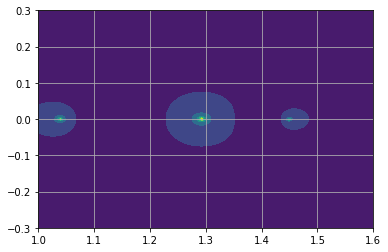

In [6]:
    plt.contourf(X,Y,np.sqrt(np.real(T)))
    plt.grid(True)
    plt.show()

## Finding the modes of the structure

Now there is an automated way to find the different modes in this structure without having to look at the map or launch by hand a few steepest descents to find their effective indexes. The function `Guided_modes` does just that, and gives all the different effectives indexes that satisfy the halting condition of the steepest descent.

In [7]:
modes = Guided_modes(structure,wavelength,0,1.01,1.6)
print(modes)

[(1.0393548947633602+5.200539560585425e-13j), (1.29233072005792+1.1920371966252435e-12j), (1.4491167148388402+2.0333011878336815e-12j)]


Once the modes have been found, it is possible to access their profile. You have to specify the effective 

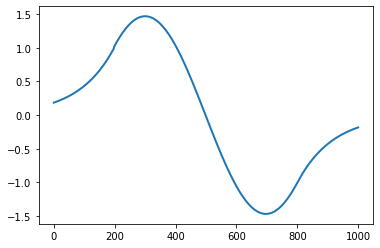

In [14]:
    # Let first modify the thickness of the superstrat which is shown
    structure.thickness[0]=200
    x,prof = Profile(structure,modes[1],wavelength,0)
    plt.plot(x,np.real(prof),linewidth = 2)


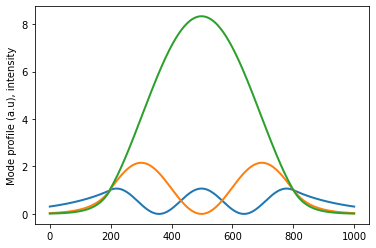

In [13]:
for k in range(len(modes)):
    x,prof = Profile(structure,modes[k],wavelength,0)
    plt.plot(x,np.abs(prof)**2,linewidth = 2)
plt.ylabel('Mode profile (a.u), intensity')
plt.show()
